<a href="https://colab.research.google.com/github/Tankasala25/PyTorch/blob/main/Conv_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#to convert MNIST images to tensor datatype
transform= transforms.ToTensor()

In [3]:
train_data=datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data=datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 602kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.69MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.6MB/s]


In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

Text(0.5, 1.0, 'label :7')

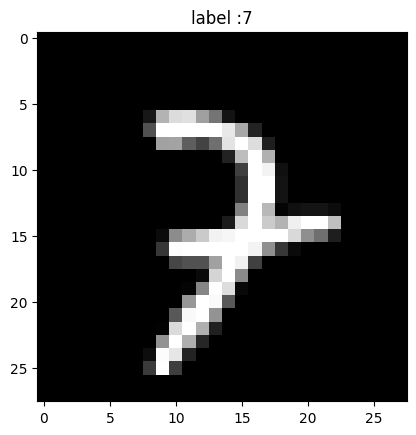

In [6]:
import random

idx=random.randint(0,len(train_data)-1)
image,label = train_data[idx]

plt.imshow(image.squeeze(),cmap='gray',interpolation='nearest')
plt.title(f"label :{label}")


In [7]:
type(image), type(label)

(torch.Tensor, int)

In [8]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [9]:
train_loader=DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_loader=DataLoader(dataset=test_data,batch_size=32,shuffle=False)

In [10]:
images,labels=next(iter(train_loader))

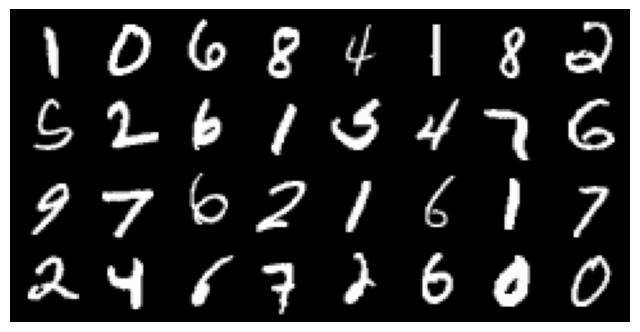

In [11]:
grid=make_grid(images,nrow=8)

plt.figure(figsize=(8,8))
plt.imshow(grid.permute(1,2,0))
plt.axis('off')
plt.show()

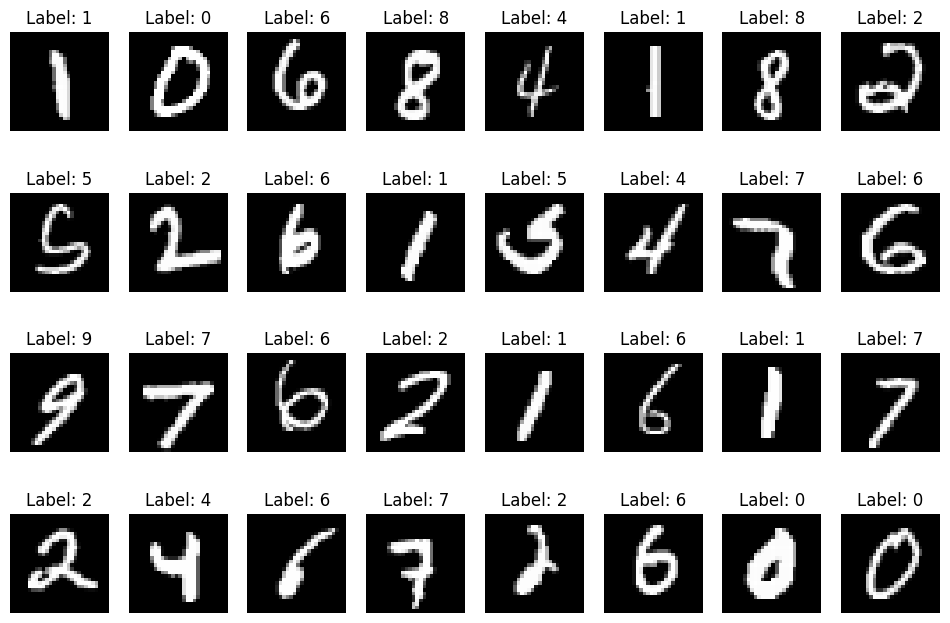

In [12]:
plt.figure(figsize=(12,8))

for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(images[i].squeeze(),cmap='gray')
  plt.title(f"Label: {labels[i].item()}")
  plt.axis(False)

plt.show()

In [13]:
class MNIST_CNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,padding=1)
    self.conv2=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding=1)
    self.pool=nn.MaxPool2d(2,2)

    self.fc1=nn.Linear(32*7*7,128)
    self.fc2=nn.Linear(128,10)

  def forward(self,X):
    X=self.pool(F.relu(self.conv1(X)))
    X=self.pool(F.relu(self.conv2(X)))
    X=torch.flatten(X,start_dim=1)
    X=F.relu(self.fc1(X))
    X=self.fc2(X)
    return X


In [14]:
model=MNIST_CNN()

In [15]:
model

MNIST_CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [16]:
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [17]:
epochs=10

for epoch in range(epochs):
  model.train()

  running_loss=0.0
  correct=0.0
  total=0.0

  for images,labels in train_loader:

    y_pred=model(images)

    l=loss(y_pred,labels)

    optimizer.zero_grad()

    l.backward()

    optimizer.step()

    running_loss += l.item() * images.size(0)
    preds=y_pred.argmax(dim=1)
    correct+=(preds==labels).sum().item()
    total+=labels.size(0)

  epoch_loss=running_loss/total
  epoch_acc = correct/total
  print(f"Epoch [{epoch+1}/{epochs}]  Loss: {epoch_loss:.4f}  Acc: {epoch_acc:.4f}")


Epoch [1/10]  Loss: 0.1794  Acc: 0.9451
Epoch [2/10]  Loss: 0.0580  Acc: 0.9825
Epoch [3/10]  Loss: 0.0402  Acc: 0.9871
Epoch [4/10]  Loss: 0.0296  Acc: 0.9909
Epoch [5/10]  Loss: 0.0223  Acc: 0.9929
Epoch [6/10]  Loss: 0.0185  Acc: 0.9941
Epoch [7/10]  Loss: 0.0133  Acc: 0.9955
Epoch [8/10]  Loss: 0.0120  Acc: 0.9958
Epoch [9/10]  Loss: 0.0092  Acc: 0.9970
Epoch [10/10]  Loss: 0.0083  Acc: 0.9971


In [33]:
model.eval()
test_running_loss = 0
test_correct = 0
test_total = 0

with torch.no_grad():
  for images, labels in test_loader:

    y_pred = model(images)

    l=loss(y_pred, labels)

    test_running_loss+= l.item() * images.size(0)

    preds=y_pred.argmax(dim=1)
    test_correct+= (preds==labels).sum().item()
    test_total+=labels.size(0)

wrong_predictions = test_total - test_correct
print(f"correct predictions from test_data:{test_correct}")
print(f"wrong predictions from test_data:{wrong_predictions}")
test_loss=test_running_loss/test_total
test_acc=test_correct/test_total

print(f"Test Loss: {test_loss:.4f}  Test Acc: {test_acc:.4f}")

correct predictions from test_data:9895
wrong predictions from test_data:105
Test Loss: 0.0441  Test Acc: 0.9895


torch.Size([32, 10])
1
tensor([18])


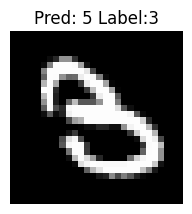

In [39]:
# showing 12 images of wrong_predictions
images , labels= next(iter(test_loader))
outputs=model(images)
preds=outputs.argmax(dim=1)

wrong_predictions = (preds!=labels)
wrong_indices = torch.where(wrong_predictions)[0]

plt.figure(figsize=(10,6))
print(outputs.shape)
print(wrong_predictions.sum().item())
print(wrong_indices)
for i, idx in enumerate(wrong_indices[:12]):
  plt.subplot(3,4,i+1)
  plt.imshow(images[idx].squeeze(),cmap='gray')
  plt.title(f"Pred: {preds[idx].item()} Label:{labels[idx].item()}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [47]:
torch.save(obj=model.state_dict(),f="mnist_cnn.pth")

In [48]:
model_mnist_cnn=MNIST_CNN()
model_mnist_cnn.load_state_dict(torch.load("mnist_cnn.pth",weights_only=False))

<All keys matched successfully>

In [49]:
model_mnist_cnn.eval()

MNIST_CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)